=== 데이터 미리보기 ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



=== 결측치 확인 ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/var/folders/dv/d2ggcx251mggn9lg3kp0q4sw0000gn/T/ipykernel_3720/2514543803.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='muted')


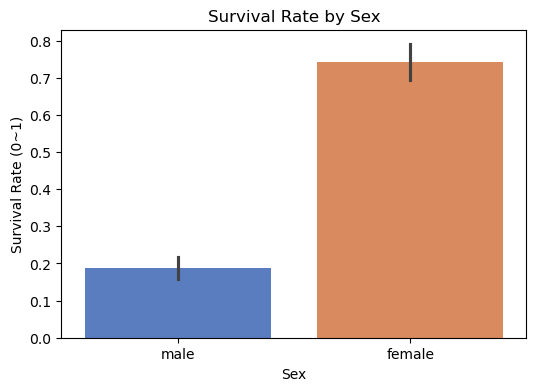


=== 생존율 수치 ===
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로드
# (파일 경로가 다르면 'train.csv' 앞에 경로를 맞춰주세요. 예: 'titanic/train.csv')
df = pd.read_csv('train.csv')

# 2. 데이터 미리보기 (상위 5줄)
print("=== 데이터 미리보기 ===")
display(df.head())

# 3. 결측치(빈 값) 확인 - 연구자에게 가장 중요한 단계
print("\n=== 결측치 확인 ===")
print(df.isnull().sum())

# 4. 시각화: 성별에 따른 생존율 (Bar Plot)
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Survived', palette='muted')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate (0~1)')
plt.show()

# 5. 수치로 확인
survival_rate = df.groupby('Sex')['Survived'].mean()
print(f"\n=== 생존율 수치 ===\n{survival_rate}")